In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

In [2]:
df_atack_1 = pd.read_csv('atacantes_mais_valorizados.csv').drop(['Unnamed: 0'], axis = 1)
df_atack_2 = pd.read_csv('atacantes_menos_valorizados.csv').drop(['Unnamed: 0'], axis = 1)
df_def = pd.read_csv('zagueiros.csv')

# Clusterizando os atacantes

### Mais Valorizados

#### Selecionando as Features

In [3]:
df_atack_1.columns

Index(['Jogador', 'Equipe', 'Minutos jogados:', 'Golos', 'Assistências',
       'Duelos ganhos, %', 'Altura', 'Duelos defensivos ganhos, %',
       'Duelos aéreos ganhos, %', 'Interseções/90',
       'Golos sem ser por penálti', 'Golos esperados/90', 'Golos de cabeça',
       'Golos de cabeça/90', 'Remate', 'Remates à baliza, %',
       'Golos marcados, %', 'Cruzamentos certos, %',
       'Cruzamentos precisos do flanco esquerdo, %',
       'Cruzamentos precisos do flanco direito, %', 'Dribles/90',
       'Dribles com sucesso, %', 'Duelos ofensivos ganhos, %',
       'Passes certos, %', 'Passes para a frente certos, %',
       'Passes para trás certos, %', 'Passes laterais certos, %',
       'Passes curtos / médios precisos, %', 'Passes longos certos, %',
       'Passes inteligentes certos, %', 'Passes certos para terço final, %',
       'Passes precisos para a área de penálti, %',
       'Passes em profundidade certos, %', 'Passes progressivos certos, %'],
      dtype='object')

In [4]:
X_at_1 = df_atack_1[['Minutos jogados:', 
       'Golos', 
       'Assistências', 
       'Duelos ganhos, %',
       'Altura', 
       'Duelos defensivos ganhos, %', 
       'Duelos ofensivos ganhos, %',
       'Duelos aéreos ganhos, %',
       'Interseções/90', 
       'Golos sem ser por penálti', 
       'Golos esperados/90',
       'Golos de cabeça', 
       'Golos de cabeça/90', 
       'Remate',
       'Passes para a frente certos, %',
       'Passes para trás certos, %'
      ]].dropna()

In [5]:
for i in X_at_1.columns:
  X_at_1[i] = MinMaxScaler().fit_transform(np.array(X_at_1[i]).reshape(-1,1))

In [6]:
X_at_1.head()

,Minutos jogados:,Golos,Assistências,"Duelos ganhos, %",Altura,"Duelos defensivos ganhos, %","Duelos ofensivos ganhos, %","Duelos aéreos ganhos, %",Interseções/90,Golos sem ser por penálti,Golos esperados/90,Golos de cabeça,Golos de cabeça/90,Remate,"Passes para a frente certos, %","Passes para trás certos, %"
0,0.844302,0.487179,0.615385,0.591588,0.870,0.483731,0.744974,0.539102,0.463068,0.516129,0.573171,0.0,0.000000,0.829787,0.993918,0.795380
1,0.365948,0.256410,0.307692,0.275831,0.875,0.548241,0.425820,0.526522,0.593750,0.258065,0.719512,0.2,0.266667,0.351064,0.777609,0.644464
2,0.366142,0.282051,0.846154,0.508077,0.875,0.405032,0.616931,0.340020,0.181818,0.322581,0.475610,0.0,0.000000,0.313830,0.856301,0.815482
3,0.333722,0.153846,0.153846,0.183176,0.920,0.591563,0.327619,0.459538,0.301136,0.193548,0.402439,0.3,0.433333,0.250000,0.424444,0.624962
4,0.421860,0.333333,0.153846,0.527278,0.910,0.585131,0.556825,0.788167,0.647727,0.290323,0.402439,0.2,0.233333,0.367021,0.618514,0.788179


In [7]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X_at_1)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X_at_1)

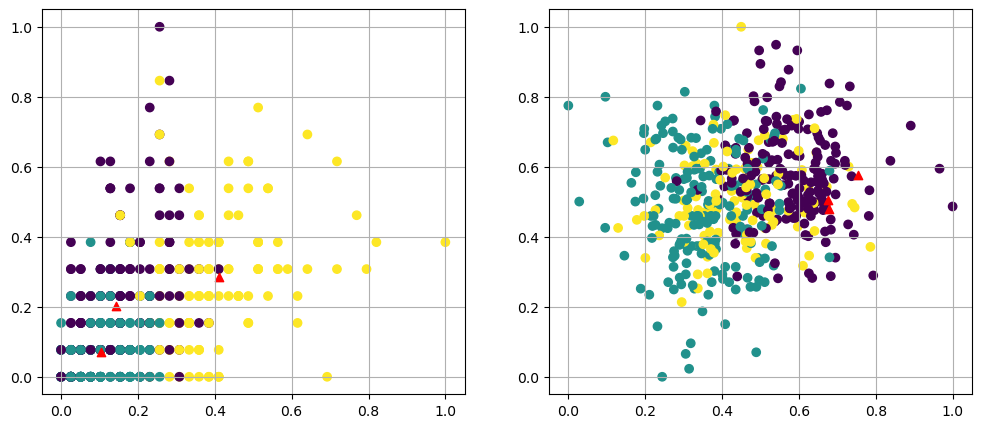

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_at_1['Golos'],X_at_1['Assistências'],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    plt.scatter(center[1],center[2],marker = '^',c = 'red')

     
plt.subplot(1,2,2)   
plt.scatter(X_at_1['Duelos ofensivos ganhos, %'],X_at_1['Duelos defensivos ganhos, %'],c = pred)
plt.grid(True)
for center in kmeans.cluster_centers_:
    plt.scatter(center[len(center)-1],center[5],marker = '^',c = 'red')
plt.show()

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


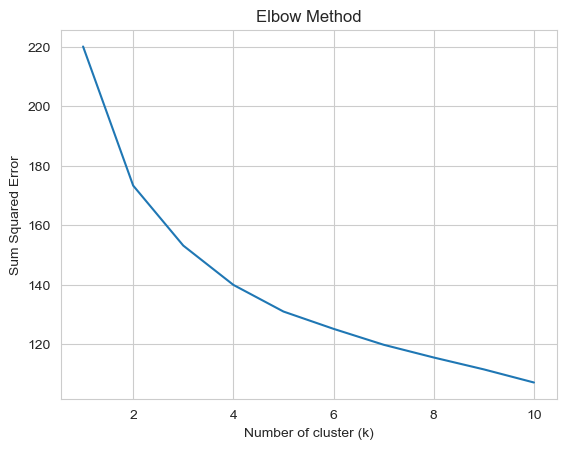

In [9]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X_at_1)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [10]:
df_atack_1['cluster'] = pred

#### Filtrando as Classes desejadas

In [11]:
df_atack_1[df_atack_1['cluster'] == 0].head()

,Jogador,Equipe,Minutos jogados:,Golos,Assistências,"Duelos ganhos, %",Altura,"Duelos defensivos ganhos, %","Duelos aéreos ganhos, %",Interseções/90,...,"Passes para trás certos, %","Passes laterais certos, %","Passes curtos / médios precisos, %","Passes longos certos, %","Passes inteligentes certos, %","Passes certos para terço final, %","Passes precisos para a área de penálti, %","Passes em profundidade certos, %","Passes progressivos certos, %",cluster
2,Neymar,Al Hilal,2292,11,11,42.60,175,47.12,20.00,0.98,...,93.85,89.32,85.91,58.24,38.81,79.76,63.03,32.95,86.54,0
4,João Pedro,Brighton,2579,13,2,43.23,182,56.64,46.36,2.62,...,92.94,77.74,81.63,53.85,34.15,63.08,52.43,26.92,80.15,0
5,Matheus Cunha,Wolverhampton Wanderers,2158,3,3,37.64,183,49.56,19.61,2.88,...,91.30,77.52,81.52,40.00,18.18,78.38,59.26,25.00,66.00,0
13,Talles Magno,New York City,2179,6,3,39.76,185,64.37,28.38,1.49,...,89.44,89.00,85.64,68.75,50.00,80.36,78.05,52.38,80.82,0
14,Felipe Anderson,Lazio,3851,10,7,44.60,175,61.15,27.94,3.18,...,92.64,80.09,83.05,59.72,42.86,72.64,48.87,40.00,74.23,0


### Menos Valorizados

In [12]:
df_atack_2.head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado
0,Robinho,CSA,"RW, LW, CF",24,300000,2023-12-31,24,1260,2,2.10,Brazil,Brazil,direito,176,75,sim
1,Kawê,Red Bull Bragantino,"LCMF, AMF, RWF",21,300000,2027-06-30,4,115,0,0.12,Brazil,Brazil,direito,178,66,sim
2,Júnior Todinho,CSA,"CF, RW",29,300000,2024-04-10,28,1918,6,7.06,Brazil,Brazil,esquerdo,182,72,sim
3,João Veras,Botafogo SP,"CF, RAMF",22,300000,2023-11-30,7,135,1,0.35,Brazil,Brazil,direito,182,73,sim
4,Salatiel,Botafogo SP,CF,31,300000,2023-11-30,33,2698,8,7.97,Brazil,Brazil,direito,187,76,sim


#### Selecionando as Features

In [13]:
df_atack_2.columns

Index(['Jogador', 'Equipa', 'Posição', 'Idade', 'Valor de mercado',
       'Contrato termina', 'Partidas jogadas', 'Minutos jogados:', 'Golos',
       'Golos esperados', 'Naturalidade', 'País de nacionalidade', 'Pé',
       'Altura', 'Peso', 'Emprestado'],
      dtype='object')

In [14]:
X = df_atack_2[['Idade',
                'Partidas jogadas', 
                'Minutos jogados:', 
                'Golos',
                'Golos esperados',
                'Pé',
                'Altura', 
                'Peso'
              ]].dropna()

In [15]:
X = pd.get_dummies(X)
X = X.div(X.sum(axis=1), axis='rows')

In [16]:
#for i in X.columns:
#  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [17]:
X.head()

,Idade,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Altura,Peso,Pé_ambos,Pé_direito,Pé_esquerdo
0,0.015344,0.015344,0.805575,0.001279,0.001343,0.112525,0.047951,0.0,0.000639,0.000000
1,0.054528,0.010386,0.298608,0.000000,0.000312,0.462194,0.171375,0.0,0.002597,0.000000
2,0.012929,0.012483,0.855082,0.002675,0.003147,0.081139,0.032099,0.0,0.000000,0.000446
3,0.052213,0.016613,0.320399,0.002373,0.000831,0.431945,0.173253,0.0,0.002373,0.000000
4,0.010191,0.010848,0.886925,0.002630,0.002620,0.061473,0.024984,0.0,0.000329,0.000000


In [18]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


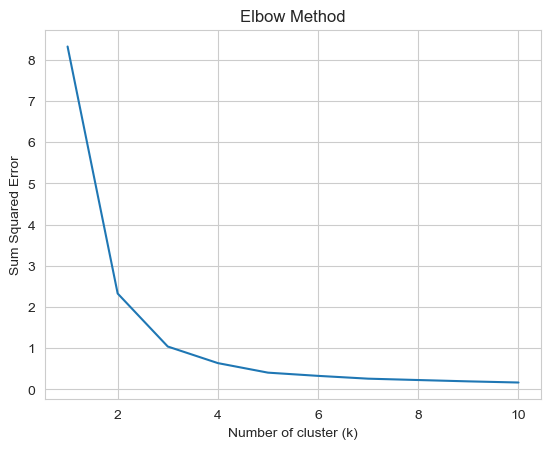

In [19]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [20]:
df_atack_2['cluster'] = pred

#### Filtrando as Classes desejadas

In [21]:
df_atack_2[df_atack_2['cluster'] == 0].head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado,cluster
0,Robinho,CSA,"RW, LW, CF",24,300000,2023-12-31,24,1260,2,2.10,Brazil,Brazil,direito,176,75,sim,0
2,Júnior Todinho,CSA,"CF, RW",29,300000,2024-04-10,28,1918,6,7.06,Brazil,Brazil,esquerdo,182,72,sim,0
4,Salatiel,Botafogo SP,CF,31,300000,2023-11-30,33,2698,8,7.97,Brazil,Brazil,direito,187,76,sim,0
5,Gabriel Bispo,KuPS,"CF, AMF",26,300000,2024-12-31,33,2019,3,6.61,Brazil,Brazil,direito,177,77,sim,0
6,Bruno Mezenga,Santos,CF,35,300000,2024-04-10,25,1432,8,3.71,Brazil,Brazil,esquerdo,185,78,sim,0


## Clusterizando os Zagueiros

In [22]:
df_def.head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado
0,Marquinhos,PSG,"RCB, LCB",29,70000000,2028-06-30,45,4117,2,1.22,Brazil,"Brazil, Portugal",direito,183,75,sim
1,Éder Militão,Real Madrid,RCB,25,70000000,2025-06-30,42,3855,6,4.88,Brazil,"Brazil, Spain",direito,186,78,sim
2,Gabriel Magalhaes,Arsenal,LCB,25,50000000,2027-06-30,51,4674,3,4.52,Brazil,Brazil,esquerdo,190,87,sim
3,Bremer,Juventus,"CB, RCB",26,40000000,2027-06-30,42,4022,4,7.26,Brazil,Brazil,direito,188,82,sim
4,Diego Carlos,Aston Villa,RCB,30,30000000,2026-06-30,11,652,0,1.36,Brazil,"Brazil, Spain",direito,185,79,sim


#### Selecionando as Features

In [23]:
df_def.columns

Index(['Jogador', 'Equipa', 'Posição', 'Idade', 'Valor de mercado',
       'Contrato termina', 'Partidas jogadas', 'Minutos jogados:', 'Golos',
       'Golos esperados', 'Naturalidade', 'País de nacionalidade', 'Pé',
       'Altura', 'Peso', 'Emprestado'],
      dtype='object')

In [24]:
X = df_def[['Idade',
                'Partidas jogadas', 
                'Minutos jogados:', 
                'Golos',
                'Golos esperados',
                'Pé',
                'Altura', 
                'Peso'
              ]].dropna()

In [25]:
X = pd.get_dummies(X)
X = X.div(X.sum(axis=1), axis='rows')

In [26]:
#for i in X.columns:
#  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [27]:
X.head()

,Idade,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Altura,Peso,Pé_ambos,Pé_direito,Pé_esquerdo
0,0.006512,0.010105,0.924500,0.000449,0.000274,0.041094,0.016842,0.0,0.000225,0.000000
1,0.005955,0.010005,0.918321,0.001429,0.001162,0.044308,0.018581,0.0,0.000238,0.000000
2,0.004965,0.010128,0.928206,0.000596,0.000898,0.037732,0.017277,0.0,0.000000,0.000199
3,0.005947,0.009606,0.919890,0.000915,0.001660,0.042998,0.018755,0.0,0.000229,0.000000
4,0.031271,0.011466,0.679620,0.000000,0.001418,0.192837,0.082347,0.0,0.001042,0.000000


In [28]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


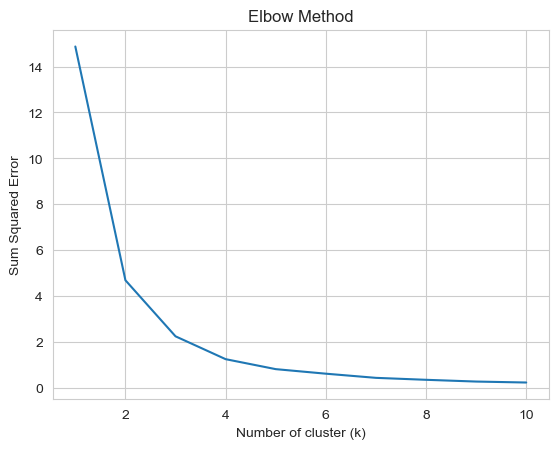

In [29]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [30]:
df_def['cluster'] = pred

#### Filtrando as Classes desejadas

In [31]:
df_def[df_def['cluster'] == 0].head()

,Jogador,Equipa,Posição,Idade,Valor de mercado,Contrato termina,Partidas jogadas,Minutos jogados:,Golos,Golos esperados,Naturalidade,País de nacionalidade,Pé,Altura,Peso,Emprestado,cluster
4,Diego Carlos,Aston Villa,RCB,30,30000000,2026-06-30,11,652,0,1.36,Brazil,"Brazil, Spain",direito,185,79,sim,0
28,Kaiky,Almería,"RCB, LCB",19,5000000,2028-06-30,14,854,1,0.22,Brazil,Brazil,direito,181,76,sim,0
56,Igor Rabello,Atlético Mineiro,RCB,28,3000000,2025-12-31,8,586,0,0.00,Brazil,Brazil,direito,190,90,sim,0
72,Lucas Ribeiro,Ceará,"LCB, RCB",24,2000000,2024-06-30,5,431,0,0.00,Brazil,Brazil,direito,190,80,sim,0
73,Rodrigo Caio,Flamengo,"CB, RCB",30,2000000,2023-12-31,9,685,0,0.33,Brazil,"Brazil, Italy",direito,183,74,sim,0


#  5 jogadores mais similares com novas Features

In [3]:
df_atack_3 = pd.read_excel('atacantes_3.xlsx')

In [4]:
df_atack_3.head()

,Jogador,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %"
0,Vinícius Júnior,20,21,43.34,3.81,76.48
1,Rodrygo,19,8,46.66,3.78,87.90
2,Gabriel Jesus,11,2,34.58,5.48,82.16
3,Neymar,8,10,41.74,2.34,83.18
4,Richarlison,6,4,34.66,4.17,71.43


#### Selecionando as Features

In [5]:
df_atack_3.columns

Index(['Jogador', 'Golos', 'Assistências', 'Duelos ganhos, %',
       'Ações defensivas com êxito/90', 'Passes certos, %'],
      dtype='object')

In [7]:
X = df_atack_3[['Golos', 'Assistências', 'Duelos ganhos, %',
       'Ações defensivas com êxito/90', 'Passes certos, %']].dropna()

In [8]:
for i in X.columns:
  X[i] = MinMaxScaler().fit_transform(np.array(X[i]).reshape(-1,1))

In [9]:
X.head()

,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %"
0,0.606061,1.000000,0.592991,0.269436,0.626162
1,0.575758,0.380952,0.695051,0.266241,0.980161
2,0.333333,0.095238,0.323701,0.447284,0.802232
3,0.242424,0.476190,0.543806,0.112886,0.833850
4,0.181818,0.190476,0.326160,0.307774,0.469622


In [10]:
kmeans = KMeans(n_clusters=3, algorithm='elkan')
kmeans.fit(X)

kmeans.cluster_centers_

pred = kmeans.fit_predict(X)

C:\Users\ismae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


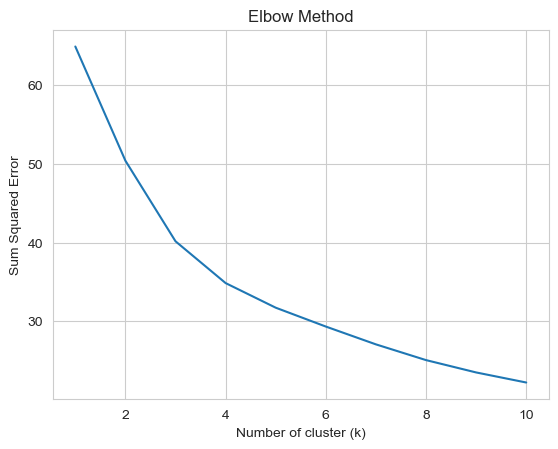

In [11]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
    
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [12]:
df_atack_3['cluster'] = pred

#### Filtrando as Classes desejadas

In [13]:
df_atack_3[df_atack_3['cluster'] == 0].head()

,Jogador,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %",cluster
2,Gabriel Jesus,11,2,34.58,5.48,82.16,0
5,João Pedro,11,3,41.60,4.66,77.78,0
6,Matheus Cunha,4,3,39.79,5.96,75.80,0
7,Roberto Firmino,7,3,39.47,5.00,85.27,0
12,Talles Magno,4,1,41.29,4.02,83.31,0


### Numero de jogadores similares

In [15]:
knn = NearestNeighbors(n_neighbors=6) # 5 mais ele mesmo

### Treinando modelo

In [16]:
knn.fit(X)

NearestNeighbors(n_neighbors=6)

#### Jogadores mais proximos ao Gabriel Barbosa

In [18]:
df_atack_3[df_atack_3['Jogador'] == "Gabriel Barbosa"]

,Jogador,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %",cluster
9,Gabriel Barbosa,20,3,35.86,1.28,83.68,1


In [27]:
similares = knn.kneighbors(X.iloc[df_atack_3[df_atack_3['Jogador'] == "Gabriel Barbosa"].index.tolist()])

In [28]:
similares[0][0][1:]

array([0.1252845 , 0.23430441, 0.24352616, 0.24757595, 0.25739216])

In [29]:
for i in similares[1][0][1:]:
    display(df_atack_3.iloc[i]["Jogador"])
    display(df_atack_3.iloc[i]["cluster"])

'Willen Mota'

1

'Sassá'

1

'Brenner'

1

'Léo Gamalho'

1

'Eduardo Sasha'

1

#### Jogadores mais proximos ao Leandro Damião

In [30]:
df_atack_3[df_atack_3['Jogador'] == "Leandro Damião"]

,Jogador,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %",cluster
108,Leandro Damião,1,1,38.02,2.87,63.64,2


In [31]:
similares = knn.kneighbors(X.iloc[df_atack_3[df_atack_3['Jogador'] == "Leandro Damião"].index.tolist()])

In [32]:
similares[0][0][1:]

array([0.15961115, 0.16094688, 0.16359702, 0.18671825, 0.19703627])

In [ ]:
np.sort(euclidean_distances(X, X.iloc[df_atack_3[df_atack_3['Jogador'] == "Fernando Boldrin"].index.tolist()]).flatten())[1:6]

In [33]:
for i in similares[1][0][1:]:
    display(df_atack_3.iloc[i]["Jogador"])
    display(df_atack_3.iloc[i]["cluster"])

'Matheus Alves'

2

'Léo Bahia'

2

'Lucas Gaúcho'

2

'Fabrício'

2

'D. Vinicius'

2

#### Jogadores mais proximos ao Fernando Boldrin.

In [34]:
df_atack_3[df_atack_3['Jogador'] == "Fernando Boldrin"]

,Jogador,Golos,Assistências,"Duelos ganhos, %",Ações defensivas com êxito/90,"Passes certos, %",cluster
440,Fernando Boldrin,0,2,37.01,3.07,87.55,0


In [35]:
similares = knn.kneighbors(X.iloc[df_atack_3[df_atack_3['Jogador'] == "Fernando Boldrin"].index.tolist()])

In [36]:
similares[0][0][1:]

array([0.10074732, 0.15850768, 0.17688558, 0.18597115, 0.19152206])

In [40]:
np.sort(euclidean_distances(X, X.iloc[df_atack_3[df_atack_3['Jogador'] == "Fernando Boldrin"].index.tolist()]).flatten())[1:6]

array([0.10074732, 0.15850768, 0.17688558, 0.18597115, 0.19152206])

In [37]:
for i in similares[1][0][1:]:
    display(df_atack_3.iloc[i]["Jogador"])
    display(df_atack_3.iloc[i]["cluster"])

'Marcos Guilherme'

0

'Thiago Andrade'

0

'Nenê Bonilha'

0

'Claudinho'

2

'Régis'

2